<a href="https://colab.research.google.com/github/alecbidaran/Designing-an-AI-assisted-toolbox-for-fitness-activity-recognition-based-on-deep-CNN/blob/main/test_haye_maghalewithcolab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from imutils import paths
import os 
import cv2
import functools


In [ ]:
train_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255,zoom_range=0.2,validation_split=0.2,horizontal_flip=True)
test_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2,horizontal_flip=True)
test1_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255,horizontal_flip=True)

In [ ]:
optical_dense='/content/drive/My Drive/datasets/traindofl=10'
RGB='/content/drive/My Drive/datasets/RGB'
test_dence='/content/drive/My Drive/datasets/test_dof'
test='/content/drive/My Drive/datasets/test'
test_rgb='/content/drive/My Drive/datasets/test_RGB (1)'
valid_rgb='/content/drive/My Drive/datasets/valid_RGB'

In [ ]:
train_dense_batch=train_datagen.flow_from_directory(optical_dense, target_size=(224, 224), color_mode='rgb', classes=None, class_mode='categorical', batch_size=16, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset='training')
train_RGB_batch=train_datagen.flow_from_directory(RGB, target_size=(224, 224), color_mode='rgb', classes=None, class_mode='categorical', batch_size=16, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset='training')
valid_RGB_batch=test_datagen.flow_from_directory(valid_rgb, target_size=(224, 224), color_mode='rgb', classes=None, class_mode='categorical', batch_size=16, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None)
valid_RGB_batch1=test_datagen.flow_from_directory(RGB, target_size=(224, 224), color_mode='rgb', classes=None, class_mode='categorical', batch_size=16, shuffle=False, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset='validation')
test_batch=test1_datagen.flow_from_directory(test_rgb, target_size=(224, 224), color_mode='rgb', classes=None, class_mode='categorical', batch_size=16, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None)
valid_dense_batch1=test_datagen.flow_from_directory(optical_dense, target_size=(224, 224), color_mode='rgb', classes=None, class_mode='categorical', batch_size=16, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset='validation')

Found 6968 images belonging to 7 classes.
Found 7838 images belonging to 7 classes.
Found 279 images belonging to 7 classes.
Found 1956 images belonging to 7 classes.
Found 2091 images belonging to 7 classes.
Found 1739 images belonging to 7 classes.


In [ ]:
pretrained_model=keras.applications.MobileNet(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [ ]:
def create_model():
  base=pretrained_model
  flatten=keras.layers.Flatten()(base.output)
  Dense1=keras.layers.Dense(1024,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5,l2=1e-4))(flatten)
  dropout=keras.layers.Dropout(0.5)(Dense1)
  classification=keras.layers.Dense(7,activation="softmax",kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5,l2=1e-4))(dropout)
  model=keras.models.Model(inputs=base.inputs,outputs=classification)
  return model


In [ ]:
model=create_model()


In [ ]:
flow_model=model

In [ ]:
flow_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [ ]:
for layer in pretrained_model.layers[:84]:
    layer.trainable=False

In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name,layer.trainable)

0 input_1 False
1 conv1_pad False
2 conv1 False
3 conv1_bn False
4 conv1_relu False
5 conv_dw_1 False
6 conv_dw_1_bn False
7 conv_dw_1_relu False
8 conv_pw_1 False
9 conv_pw_1_bn False
10 conv_pw_1_relu False
11 conv_pad_2 False
12 conv_dw_2 False
13 conv_dw_2_bn False
14 conv_dw_2_relu False
15 conv_pw_2 False
16 conv_pw_2_bn False
17 conv_pw_2_relu False
18 conv_dw_3 False
19 conv_dw_3_bn False
20 conv_dw_3_relu False
21 conv_pw_3 False
22 conv_pw_3_bn False
23 conv_pw_3_relu False
24 conv_pad_4 False
25 conv_dw_4 False
26 conv_dw_4_bn False
27 conv_dw_4_relu False
28 conv_pw_4 False
29 conv_pw_4_bn False
30 conv_pw_4_relu False
31 conv_dw_5 False
32 conv_dw_5_bn False
33 conv_dw_5_relu False
34 conv_pw_5 False
35 conv_pw_5_bn False
36 conv_pw_5_relu False
37 conv_pad_6 False
38 conv_dw_6 False
39 conv_dw_6_bn False
40 conv_dw_6_relu False
41 conv_pw_6 False
42 conv_pw_6_bn False
43 conv_pw_6_relu False
44 conv_dw_7 False
45 conv_dw_7_bn False
46 conv_dw_7_relu False
47 conv_pw_7 Fal

In [ ]:
def scheduler(epoch, lr):
  if epoch<10:
    return lr 
  else:
    return lr*tf.math.exp(-0.1)

In [ ]:
keras.backend.clear_session()
top5acc=functools.partial(keras.metrics.top_k_categorical_accuracy,k=5)
top5acc.__name__="top5acc"
top1acc=functools.partial(keras.metrics.top_k_categorical_accuracy,k=1)
top1acc.__name__="top1acc"
flow_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=1e-3,momentum=0.9,decay=1e-3/30),metrics=[top5acc,top1acc])
#last_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=1e-3,momentum=0.9,decay=1e-3/30),metrics=[top5acc,top1acc])


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping
sched = tf.keras.callbacks.LearningRateScheduler(scheduler)
checkpoint=keras.callbacks.ModelCheckpoint(
        filepath='finetune_mobilenet_dense.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True)
earlystopping=keras.callbacks.EarlyStopping(min_delta=0.1,patience=10,restore_best_weights=True)
callbacks=[earlystopping,ReduceLROnPlateau(),sched]

In [ ]:
tf.random.set_seed(0)
history=flow_model.fit(train_dense_batch,validation_data=valid_dense_batch1,steps_per_epoch=1000,validation_steps=3000//16,epochs=30,workers=16,verbose=1,callbacks=callbacks)

Epoch 1/30
1000/1000 [==============================] - 113s 113ms/step - loss: 3.3838 - top5acc: 0.9955 - top1acc: 0.9250 - val_loss: 5.3132 - val_top5acc: 0.9782 - val_top1acc: 0.5959
Epoch 2/30
1000/1000 [==============================] - 112s 112ms/step - loss: 2.9739 - top5acc: 0.9998 - top1acc: 0.9869 - val_loss: 5.3204 - val_top5acc: 0.9756 - val_top1acc: 0.6284
Epoch 3/30
1000/1000 [==============================] - 112s 112ms/step - loss: 2.8999 - top5acc: 0.9997 - top1acc: 0.9924 - val_loss: 5.6723 - val_top5acc: 0.9615 - val_top1acc: 0.5926
Epoch 4/30
  70/1000 [=>............................] - ETA: 1:32 - loss: 2.8710 - top5acc: 1.0000 - top1acc: 0.9920

Text(0, 0.5, 'accuracy')

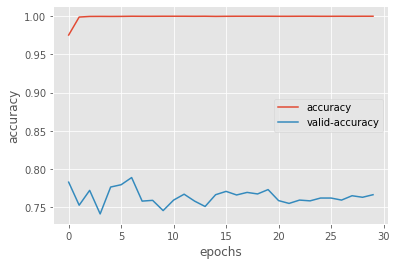

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(history.history['top1acc'],label='accuracy')
plt.plot(history.history['val_top1acc'],label='valid-accuracy')
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")


Text(0, 0.5, 'loss')

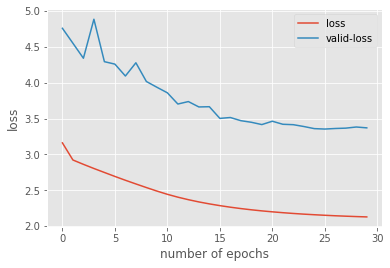

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='valid-loss')
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("loss")


In [ ]:
RGB_model.evaluate(test_batch,workers=16)

131/131 [==============================] - 93s 707ms/step - loss: 2.8307 - top5acc: 1.0000 - top1acc: 0.8436


[2.8306870460510254, 1.0, 0.8436154723167419]

In [ ]:
flow_model.evaluate(valid_dense_batch1,steps=500,workers=16)

500/500 [==============================] - 13s 27ms/step - loss: 4.5887 - top5acc: 0.9465 - top1acc: 0.6187


[4.588708877563477, 0.9464912414550781, 0.6186716556549072]

In [ ]:
flow_model.save("flowucfmobilenet.h5")

In [ ]:
!cp "/content/flowucfmobilenet.h5"  "/content/drive/My Drive/nets/"

In [ ]:
RGB_model.evaluate(valid_RGB_batch1,steps=500,workers=8)

In [ ]:
RGB_model.save("RGBucfmobilenet.h5")

In [ ]:
tf.random.set_seed(0)
history3=Rgb_model.fit(train_RGB_batch,verbose=1,epochs=50,validation_data=valid_RGB_batch1,callbacks=callbacks,workers=16)


Epoch 1/50
245/245 [==============================] - 378s 2s/step - loss: 2.6298 - top5acc: 0.7825 - top1acc: 0.1942 - val_loss: 1.8200 - val_top5acc: 0.9289 - val_top1acc: 0.2030
Epoch 2/50
245/245 [==============================] - 53s 217ms/step - loss: 1.8284 - top5acc: 0.8376 - top1acc: 0.2529 - val_loss: 1.8280 - val_top5acc: 0.8931 - val_top1acc: 0.2526
Epoch 3/50
245/245 [==============================] - 54s 218ms/step - loss: 1.8615 - top5acc: 0.8403 - top1acc: 0.2060 - val_loss: 1.8226 - val_top5acc: 0.9131 - val_top1acc: 0.1963
Epoch 4/50
245/245 [==============================] - 53s 218ms/step - loss: 1.8210 - top5acc: 0.8500 - top1acc: 0.2327 - val_loss: 1.8415 - val_top5acc: 0.8338 - val_top1acc: 0.2147
Epoch 5/50
245/245 [==============================] - 53s 218ms/step - loss: 1.7779 - top5acc: 0.8626 - top1acc: 0.2501 - val_loss: 1.8597 - val_top5acc: 0.8083 - val_top1acc: 0.1820
Epoch 6/50
245/245 [==============================] - 98s 399ms/step - loss: 1.8975 - t

KeyboardInterrupt: ignored

Text(0, 0.5, 'percent')

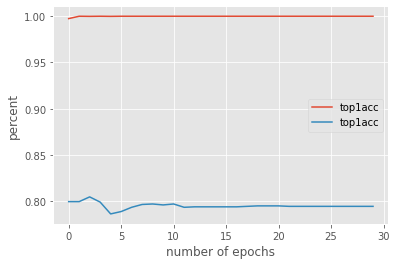

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.plot(history3.history['top1acc'],label='top1acc')
plt.plot(history3.history['val_top1acc'],label='top1acc')
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("percent")


Text(0, 0.5, 'percent')

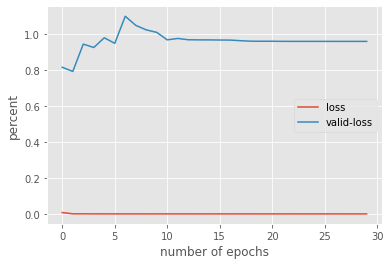

In [ ]:
plt.style.use('ggplot')
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['val_loss'],label='valid-loss')
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel("percent")


Text(0, 0.5, ' accuracypercent')

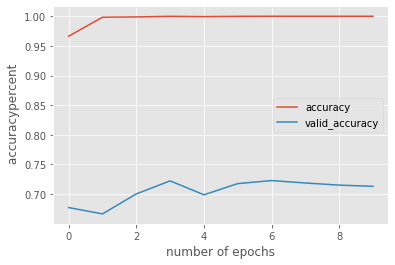

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history3.history['accuracy'],label='accuracy')
plt.plot(history3.history['val_accuracy'],label='valid_accuracy')
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel(" accuracypercent")


Text(0, 0.5, ' loss')

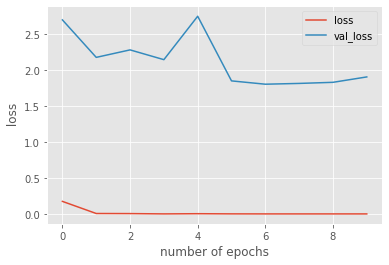

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.legend()
plt.xlabel("number of epochs")
plt.ylabel(" loss")

In [ ]:
Rgb_model.save('rgb_lastmodelmobilenet.h5')

In [ ]:
Rgb_model.load_weights("/content/rgb_lastmodelmobilenet.h5")

In [ ]:
Rgb_model.evaluate(test_batch,workers=16)

66/66 [==============================] - 3s 44ms/step - loss: 1.9567 - top5acc: 0.9876 - top1acc: 0.6920


[1.9566926956176758, 0.9875657558441162, 0.6920133829116821]

In [ ]:
predict=Rgb_model.predict(test_batch,workers=16)

In [ ]:
predict

array([[3.9800170e-16, 2.9086202e-18, 1.8055388e-10, ..., 2.0622362e-19,
        1.0000000e+00, 3.2200558e-16],
       [1.5857641e-09, 6.0972950e-13, 1.3363795e-05, ..., 1.2984713e-13,
        4.7441450e-19, 9.9998665e-01],
       [1.6250522e-11, 9.4866753e-01, 3.7053067e-02, ..., 1.4272505e-02,
        1.3604372e-06, 5.6011932e-06],
       ...,
       [2.1217300e-10, 6.6035341e-08, 9.9857390e-01, ..., 6.3474652e-09,
        1.1180583e-06, 1.4248231e-03],
       [4.3743107e-17, 6.7426519e-18, 2.7743352e-10, ..., 1.6011696e-21,
        1.0000000e+00, 3.7884367e-18],
       [9.9998176e-01, 6.5906899e-17, 1.1591643e-13, ..., 1.8093200e-05,
        3.8612963e-14, 1.1069572e-07]], dtype=float32)

In [ ]:
real=test_batch.classes
max=np.argmax(predict,axis=1)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [ ]:
confue_matrix=tf.math.confusion_matrix(real,max)